<a href="https://colab.research.google.com/github/waseda-ken/data_analyze_kikagaku/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E5%89%8D%E5%87%A6%E7%90%86%E3%80%80%E5%BF%9C%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## データ前処理　応用

In [ ]:
# モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# 画像の読み込み
df = pd.read_csv('car_price.csv')
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [ ]:
# データの形を確認
df.shape

(205, 26)

## 欠損値処理

In [ ]:
# 欠損値の数を確認
df.isnull().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [ ]:
# 削除前の shape の確認
df.shape

(205, 26)

In [ ]:
df = df.dropna(subset=['price','horsepower','peak-rpm']) # デフォルトでaxis=0なので、行方向に削除が実行されます。

In [ ]:
# 削除後の shape の確認
df.shape

(199, 26)

In [ ]:
df = df.drop(labels='normalized-losses', axis=1)


In [ ]:
df.shape
df.head(3)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [ ]:
# 欠損値の確認
df.isnull().sum()

,0
symboling,0
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0
length,0


In [ ]:
df['bore'].describe()

,bore
count,195.000000
mean,3.329385
std,0.271866
min,2.540000
25%,3.150000
50%,3.310000
75%,3.590000
max,3.940000


(array([ 1.,  1.,  8., 35., 39., 24., 25., 42., 17.,  3.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

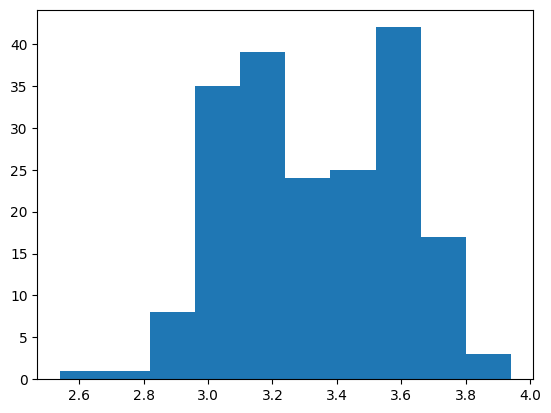

In [ ]:
plt.hist(df['bore'])


In [ ]:
df['stroke'].describe()


,stroke
count,195.000000
mean,3.250308
std,0.314115
min,2.070000
25%,3.110000
50%,3.290000
75%,3.410000
max,4.170000


(array([ 3.,  1., 13.,  7., 27., 52., 70., 15.,  5.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

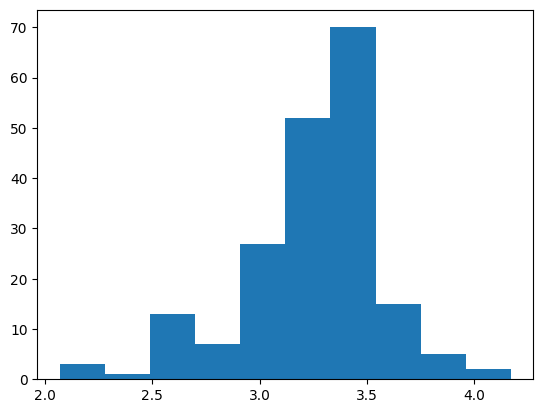

In [ ]:
plt.hist(df['stroke'].dropna())


In [ ]:
# 欠損値を平均値で補完
df = df.fillna({'bore':df['bore'].mean(), 'stroke':df['stroke'].mean()})


In [ ]:
# 欠損値の確認
df.isnull().sum()

,0
symboling,0
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0
length,0


In [ ]:
df['num-of-doors'].unique()
df['num-of-doors'].mode()[0]


'four'

In [ ]:
# 最頻値を使用して欠損値を補完
df = df.fillna({'num-of-doors':df['num-of-doors'].mode()[0]})


In [ ]:
df.isnull().sum()


,0
symboling,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0
length,0


## カテゴリカル変数処理

In [ ]:
# カテゴリカル変数を含んだデータのみを抽出
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


In [ ]:
# nunique()関数でそれぞれの列のユニークな値の数を確認することが出来ます。
df_uni = df_obj.nunique()
df_uni

,0
make,21
fuel-type,2
aspiration,2
num-of-doors,2
body-style,5
drive-wheels,3
engine-location,2
engine-type,6
num-of-cylinders,7
fuel-system,8


In [ ]:
df_cols = df_uni[df_uni==2].index
df_cols

Index(['fuel-type', 'aspiration', 'num-of-doors', 'engine-location'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df_cols:
  le = LabelEncoder()
  le.fit(df[col])
  df[col] = le.transform(df[col])

In [ ]:
# Encodingが完了していることを確認
df[df_cols].head(2)

,fuel-type,aspiration,num-of-doors,engine-location
0,1,0,1,0
1,1,0,1,0


In [ ]:
df.shape


(199, 25)

In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
df.head(3)

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df.shape


(199, 63)

## 重回帰分析の実装

In [ ]:
# 入力変数と出力変数の切り分け
t = df['price'].values
x = df.drop(['price'], axis=1).values

In [ ]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

In [ ]:
# モデルの宣言
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [ ]:
# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.973412079625046
test score :  0.8617805165928993


## 特徴量エンジニアリング

メーカー	クラス	説明

audi, bmw, jaguar, mercedes-benz, porsche	3	高級層

alfa-romero, chevrolet, mercury, volvo, toyota, plymouth, dodge	2	中間層

honda, isuzu, mazda, mitsubishi, nissan, peugot, saab, subaru, volkswagen	1	大衆層



In [ ]:
# クラス分けのリストの定義
class_3 = ['audi', 'bmw', 'jaguar', 'mercedes-benz', 'porsche']
class_2 = ['alfa-romero', 'chevrolet',  'mercury', 'volvo', 'toyota', 'plymouth', 'dodge']
class_1 = ['honda', 'isuzu', 'mazda', 'mitsubishi', 'nissan', 'peugot', 'saab', 'subaru', 'volkswagen']

In [ ]:
# それぞれを置換するリストの作成
maker_class = []
for i in df_obj['make']:
    if i in class_3:
        maker_class.append(3)
    elif i in class_2:
        maker_class.append(2)
    elif i in class_1:
        maker_class.append(1)

In [ ]:
maker_class[:10]


[2, 2, 2, 3, 3, 3, 3, 3, 3, 3]

In [ ]:
df_obj['make'][:10]


,make
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
5,audi
6,audi
7,audi
8,audi
10,bmw


In [ ]:
# データフレームをコピー
df2 = df.copy()

In [ ]:
# 列を追加
df2['maker_class']  = maker_class


In [ ]:
t = df2['price'].values #df2に変更
x = df2.drop(['price'], axis=1).values #df2に変更

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, t_train)

print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.9734120796250461
test score :  0.8620181200017681


## 外れ値除去

## 3σ法

μ-3σ=<x=<μ+3σ

μ	平均
σ	標準偏差


<Axes: xlabel='price', ylabel='Density'>

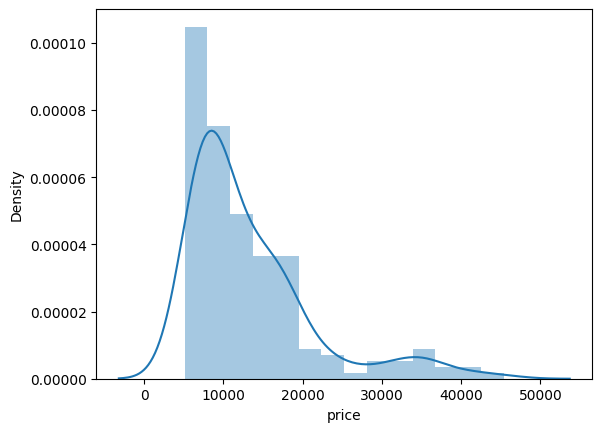

In [ ]:
# 分布を表示
sns.distplot(df['price'])


In [ ]:
mu = df['price'].mean() # 平均値
sigma = df['price'].std() # 標準偏差

In [ ]:
# 3σ法の中身を取得
df3 = df[(mu - 3 * sigma <= df['price']) & (df['price'] <= mu + 3 * sigma)]

In [ ]:
# オリジナルのデータフレーム
df.shape

(199, 63)

In [ ]:
# 外れ値除去後のデータフレーム
df3.shape

(196, 63)

<Axes: xlabel='price', ylabel='Density'>

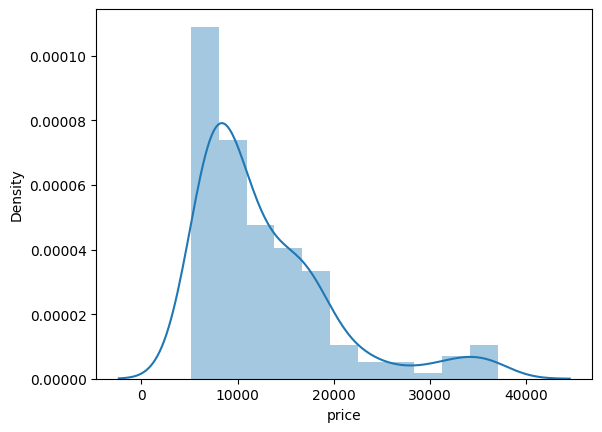

In [ ]:
# 分布を表示
sns.distplot(df3['price'])

## ハンぺル判別法

median(x) - 3MAD =< x =< mesian(x) + 3MAD

MAD = 1.4826median(|x - median(x)|)

In [ ]:
# 中央値を算出
median = df['price'].median()
median

10345.0

In [ ]:
# absは指定の値を絶対値に変換。np.medianで中央値を算出
MAD = 1.4826 * np.median(abs(df['price']-median))
MAD

np.float64(4975.6056)

In [ ]:
df4 = df[(median - 3 * MAD <= df['price']) & (df['price'] <= median + 3 * MAD)]


In [ ]:
df.shape

(199, 63)

In [ ]:
df4.shape

(182, 63)

<Axes: xlabel='price', ylabel='Density'>

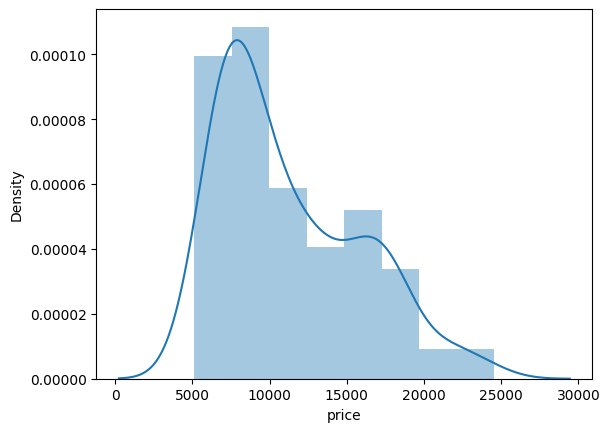

In [ ]:
sns.distplot(df4['price'])


In [ ]:
t = df3['price'].values #df3に変更
x = df3.drop(['price'], axis=1).values #df3 に変更

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, t_train)

print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.9776827981599897
test score :  0.919766924890063


In [ ]:
import numpy as np

# 与えられたデータ
x = np.array([6, 75, 47, 1, 1, 93, 39, 89, 1, 5, 81, 12, 62, 80, 59])

# 平均と不偏標準偏差（ddof=1）を求める
mu  = x.mean()
sigma = x.std(ddof=1)

# 3σ 上限
upper = mu + 3 * sigma

# 小数第二位まで（第三位を四捨五入）
print(round(upper, 2))


151.46
